In [ ]:
# ВНИМАНИЕ; версия Pillow установвленна по умолчанию - '7.0.0'
# Эта версия ломает torchvision
import PIL
PIL.__version__

'5.3.0'

In [ ]:
!pip uninstall -y Pillow
!pip install -Iv Pillow==5.3.0

Found existing installation: Pillow 5.3.0
Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https:/

---


**ВНИМАНИЕ: На этом этапе обязательно перезагрузить рантайм (Runtime -> Restart Runtime). Иначе версия 5.3.0 не будет загружена в рантайм.**

После перезапуска рантайма следует продолжить исполнять ячейки далее.

---



## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 

### Установка зависимостей

In [ ]:
!pip install -U torch torchvision

In [ ]:
# ИСПРАВЛЕНИЕ: к сожалению этот код не работает у меня на коллабе
# плюс что-то намудрено с именами в репозитории pytorch
  
# установка подходящей версии torch

#from os.path import exists
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
#platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
#cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
#accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

#!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.5.0%2B{platform}-linux_x86_64.whl torchvision
#import torch

ERROR: torch-1.5.0+cp36-cp36m-linux_x86_64.whl is not a valid wheel filename.


In [ ]:
# ИСПРАВЛЕНИЕ:
# Вручную ищем и устанавливаем подходящуюю версию 
# https://download.pytorch.org/whl/torch_stable.html 
!pip install -q 'https://download.pytorch.org/whl/cu101/torch-1.5.0%2Bcu101-cp36-cp36m-linux_x86_64.whl' torchvision
import torch

ERROR: torch-1.5.0+cu101-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
# ВНИМАНИЕ: мы это уже сделали вначале ноутбука

# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
#!pip uninstall -y Pillow
#!pip install Pillow==5.3.0
#import PIL
#print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).




---

**ВНИМАНИЕ: скачайте датасет с каггла и положите его в корень своего гугл диска!**

---



In [ ]:
# ИСПРАВЛЕНИЕ
#!unzip -q /content/gdrive/My\ Drive/simpsons/data/dataset.zip -d train
#!unzip -q /content/gdrive/My\ Drive/simpsons/data/testset.zip -d test

!unzip -q /content/gdrive/My\ Drive/journey-springfield.zip

replace characters_illustration.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img100.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img101.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img102.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img103.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img104.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img105.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace testset/testset/img106.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
a

A


In [ ]:
!ls train

simpsons_dataset


In [ ]:
!nvidia-smi
import torch
torch.cuda.is_available()

Fri Nov 26 14:24:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [ ]:
import pickle
import numpy as np
import random
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 299
# работаем на видеокарте
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} \\$,      константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [ ]:
class SimpsonsDataset(Dataset):
    """
Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        if self.mode == 'train': 
            transform = transforms.Compose([
                transforms.Resize(size=(RESCALE_SIZE, RESCALE_SIZE)),
                #transforms.RandomRotation(degrees=30),
                transforms.RandomHorizontalFlip(),
                #transforms.ColorJitter(hue=.1, saturation=.1),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        else:
            transform = transforms.Compose([
                transforms.Resize(size=(RESCALE_SIZE, RESCALE_SIZE)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
            ])
        x = self.load_sample(self.files[index])
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [ ]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [ ]:
#if val_dataset is None:
val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
def create_dct_path_labels(train_files, train_labels):
    dct_simpsons = {}
    for label_i in np.unique(train_labels).tolist():
        dct_simpsons[label_i] = []

    for path_i, label_i in zip(train_files, train_labels):
        dct_simpsons[label_i].append(path_i)

    return dct_simpsons

# Создадим словарь в котором ключами будут персонажи Симпсонов, а значениями списки с путями к картинкам.
dct_path_train = create_dct_path_labels(train_files, train_dataset.labels)

# Дополним картинки классов у которых менее 100 картинок, до 100 картинок в классе
for person in dct_path_train:
    if len(dct_path_train[person]) < 100:
        dct_path_train[person] = dct_path_train[person] * (100 // len(dct_path_train[person]))
        dct_path_train[person].extend(dct_path_train[person][:100 - len(dct_path_train[person])])
# Проверим что получилось 
for person in dct_path_train:
    print(f"{person}\t{len(dct_path_train[person])}")
new_train_files = []

for person in dct_path_train:
    new_train_files.extend(dct_path_train[person])

val_dataset = SimpsonsDataset(val_files, mode='val')
new_train_dataset = SimpsonsDataset(new_train_files, mode='train')

abraham_grampa_simpson	685
agnes_skinner	100
apu_nahasapeemapetilon	467
barney_gumble	100
bart_simpson	1006
carl_carlson	100
charles_montgomery_burns	895
chief_wiggum	739
cletus_spuckler	100
comic_book_guy	352
disco_stu	100
edna_krabappel	343
fat_tony	100
gil	100
groundskeeper_willie	100
homer_simpson	1684
kent_brockman	373
krusty_the_clown	904
lenny_leonard	233
lionel_hutz	100
lisa_simpson	1015
maggie_simpson	100
marge_simpson	968
martin_prince	100
mayor_quimby	185
milhouse_van_houten	809
miss_hoover	100
moe_szyslak	1089
ned_flanders	1090
nelson_muntz	269
otto_mann	100
patty_bouvier	100
principal_skinner	895
professor_john_frink	100
rainier_wolfcastle	100
ralph_wiggum	100
selma_bouvier	100
sideshow_bob	658
sideshow_mel	100
snake_jailbird	100
troy_mcclure	100
waylon_smithers	136


In [ ]:
val_dataset = SimpsonsDataset(val_files, mode='val')

In [ ]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

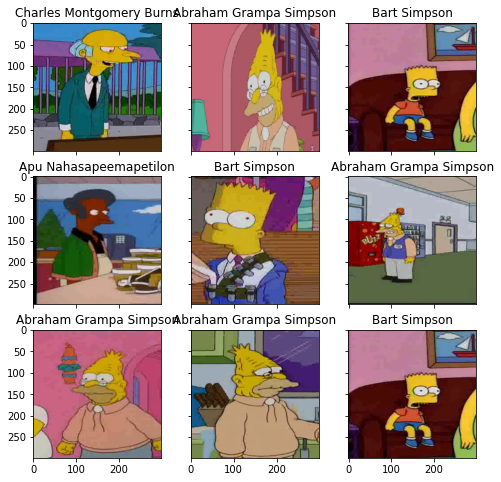

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [ ]:
# Очень простая сеть
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [ ]:
def train(train_dataset, val_dataset, model, epochs, batch_size, scheduler):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.AdamW(model.parameters())
        scheduler = torch.optim.lr_scheduler.StepLR(opt, 3, 0.5)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            scheduler.step()
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
n_classes = len(np.unique(train_val_labels))

**AlexNet**\
Обучим AlexNet с помощью уменьшенного learning rate на первых слоях сети

In [ ]:
#Обучение AlexNet с уменьшенным learning rate для первых слоев сети
from torchvision import models
from torch.optim import lr_scheduler
alex_dif_lr = models.alexnet(pretrained=True)
num_features = 9216 #количество features поступающих на вход классифатору
alex_dif_lr.classifier = nn.Linear(num_features, n_classes)

optimizer = torch.optim.Adam(params=[
                                     {'params': alex_dif_lr.classifier.parameters()},
                                     {'params': alex_dif_lr.features.parameters(), 'lr': 1e-5}],
                             lr = 1e-4 )
criterion = nn.CrossEntropyLoss()

exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
alex_dif_lr.to("cuda")

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Linear(in_features=9216, out_features=42, bias=True)
)

In [ ]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

Запустим обучение сети.

In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=alex_dif_lr, epochs=25, batch_size=64, scheduler=exp_lr_scheduler)

epoch:   0%|          | 0/25 [00:00<?, ?it/s]

loss 1.8138357619926713


epoch:   4%|▍         | 1/25 [03:32<1:25:02, 212.62s/it]


Epoch 001 train_loss: 1.8138     val_loss 1.2920 train_acc 0.5107 val_acc 0.6788
loss 0.8780183015230226


epoch:   8%|▊         | 2/25 [07:03<1:21:04, 211.49s/it]


Epoch 002 train_loss: 0.8780     val_loss 0.7675 train_acc 0.7697 val_acc 0.8003
loss 0.6359953751601386


epoch:  12%|█▏        | 3/25 [10:32<1:17:07, 210.36s/it]


Epoch 003 train_loss: 0.6360     val_loss 0.7371 train_acc 0.8256 val_acc 0.8139
loss 0.35337579678178127


epoch:  16%|█▌        | 4/25 [13:59<1:13:13, 209.21s/it]


Epoch 004 train_loss: 0.3534     val_loss 0.5448 train_acc 0.9025 val_acc 0.8745
loss 0.23597846992175756


epoch:  20%|██        | 5/25 [17:25<1:09:17, 207.86s/it]


Epoch 005 train_loss: 0.2360     val_loss 0.5230 train_acc 0.9345 val_acc 0.8722
loss 0.1716219399569786


epoch:  24%|██▍       | 6/25 [20:48<1:05:20, 206.36s/it]


Epoch 006 train_loss: 0.1716     val_loss 0.5049 train_acc 0.9536 val_acc 0.8865
loss 0.08098909622045815


epoch:  28%|██▊       | 7/25 [24:12<1:01:39, 205.51s/it]


Epoch 007 train_loss: 0.0810     val_loss 0.4997 train_acc 0.9775 val_acc 0.9018
loss 0.04924552077506407


epoch:  32%|███▏      | 8/25 [27:35<57:58, 204.60s/it]


Epoch 008 train_loss: 0.0492     val_loss 0.4732 train_acc 0.9887 val_acc 0.9060
loss 0.027816702559710114


epoch:  36%|███▌      | 9/25 [30:56<54:17, 203.60s/it]


Epoch 009 train_loss: 0.0278     val_loss 0.5768 train_acc 0.9930 val_acc 0.9050
loss 0.015192230830932584


epoch:  40%|████      | 10/25 [34:19<50:49, 203.30s/it]


Epoch 010 train_loss: 0.0152     val_loss 0.5352 train_acc 0.9965 val_acc 0.9108
loss 0.010971405674610933


epoch:  44%|████▍     | 11/25 [37:45<47:37, 204.14s/it]


Epoch 011 train_loss: 0.0110     val_loss 0.5470 train_acc 0.9982 val_acc 0.9112
loss 0.005442175711693468


epoch:  48%|████▊     | 12/25 [41:13<44:31, 205.49s/it]


Epoch 012 train_loss: 0.0054     val_loss 0.5677 train_acc 0.9990 val_acc 0.9127
loss 0.004952052448922415


epoch:  52%|█████▏    | 13/25 [44:44<41:23, 206.94s/it]


Epoch 013 train_loss: 0.0050     val_loss 0.5441 train_acc 0.9992 val_acc 0.9127
loss 0.002974001636551311


epoch:  56%|█████▌    | 14/25 [48:11<37:57, 207.09s/it]


Epoch 014 train_loss: 0.0030     val_loss 0.5561 train_acc 0.9997 val_acc 0.9144
loss 0.0017004465930918102


epoch:  60%|██████    | 15/25 [51:39<34:32, 207.25s/it]


Epoch 015 train_loss: 0.0017     val_loss 0.5704 train_acc 0.9997 val_acc 0.9154
loss 0.0015928589396118332


epoch:  64%|██████▍   | 16/25 [55:09<31:12, 208.05s/it]


Epoch 016 train_loss: 0.0016     val_loss 0.5714 train_acc 0.9999 val_acc 0.9154
loss 0.001324996622163012


epoch:  68%|██████▊   | 17/25 [58:39<27:51, 208.92s/it]


Epoch 017 train_loss: 0.0013     val_loss 0.5804 train_acc 0.9999 val_acc 0.9138
loss 0.0010382890914132506


epoch:  72%|███████▏  | 18/25 [1:02:10<24:26, 209.45s/it]


Epoch 018 train_loss: 0.0010     val_loss 0.5860 train_acc 0.9998 val_acc 0.9140
loss 0.0006654168693503304


epoch:  76%|███████▌  | 19/25 [1:05:41<20:59, 209.90s/it]


Epoch 019 train_loss: 0.0007     val_loss 0.5879 train_acc 0.9999 val_acc 0.9138
loss 0.001042797764227039


epoch:  80%|████████  | 20/25 [1:09:12<17:31, 210.31s/it]


Epoch 020 train_loss: 0.0010     val_loss 0.5911 train_acc 0.9998 val_acc 0.9144
loss 0.0012143982138136606


epoch:  84%|████████▍ | 21/25 [1:12:43<14:02, 210.54s/it]


Epoch 021 train_loss: 0.0012     val_loss 0.5960 train_acc 0.9997 val_acc 0.9150
loss 0.000788171011676253


epoch:  88%|████████▊ | 22/25 [1:16:13<10:30, 210.30s/it]


Epoch 022 train_loss: 0.0008     val_loss 0.5963 train_acc 0.9999 val_acc 0.9136
loss 0.0006239485616946427


epoch:  92%|█████████▏| 23/25 [1:19:43<07:00, 210.04s/it]


Epoch 023 train_loss: 0.0006     val_loss 0.5977 train_acc 0.9999 val_acc 0.9135
loss 0.0006597688060525976


epoch:  96%|█████████▌| 24/25 [1:23:12<03:29, 209.72s/it]


Epoch 024 train_loss: 0.0007     val_loss 0.6005 train_acc 0.9998 val_acc 0.9127
loss 0.0005657947283556949


epoch: 100%|██████████| 25/25 [1:26:40<00:00, 208.03s/it]


Epoch 025 train_loss: 0.0006     val_loss 0.6011 train_acc 0.9999 val_acc 0.9127


**Inception v3**\
Попробуем inception v3\
Для этого изменим RESCALE_SIZE = 299

In [ ]:
from torchvision import models
from torch.optim import lr_scheduler
inception_v3 = models.inception_v3(pretrained=True)

In [ ]:
inception_v3.AuxLogits.fc = nn.Linear(768, n_classes)
inception_v3.fc = nn.Linear(2048, n_classes)

In [ ]:
num_features = 25088

inception_v3.classifier = nn.Linear(num_features, n_classes)
 
inception_v3 = inception_v3.cuda()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(inception_v3.parameters(), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


In [ ]:
inception_v3.aux_logits = False


In [ ]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
history = train(train_dataset, val_dataset, model=inception_v3, epochs=25, batch_size=64, scheduler=exp_lr_scheduler)

epoch:   0%|          | 0/25 [00:00<?, ?it/s]

loss 0.5315495976000404


epoch:   4%|▍         | 1/25 [12:06<4:50:37, 726.56s/it]


Epoch 001 train_loss: 0.5315     val_loss 0.5172 train_acc 0.8724 val_acc 0.8556
loss 3.7943036179913405


epoch:   8%|▊         | 2/25 [23:40<4:31:15, 707.64s/it]


Epoch 002 train_loss: 3.7943     val_loss 3.1111 train_acc 0.1066 val_acc 0.1074
loss 3.11551001705374


epoch:  12%|█▏        | 3/25 [35:14<4:17:08, 701.29s/it]


Epoch 003 train_loss: 3.1155     val_loss 3.1103 train_acc 0.1073 val_acc 0.1074
loss 3.1113707089364904


epoch:  16%|█▌        | 4/25 [46:47<4:04:14, 697.82s/it]


Epoch 004 train_loss: 3.1114     val_loss 3.1060 train_acc 0.1073 val_acc 0.1074
loss 3.1106238937718116


epoch:  20%|██        | 5/25 [58:21<3:52:14, 696.73s/it]


Epoch 005 train_loss: 3.1106     val_loss 3.1089 train_acc 0.1073 val_acc 0.1074
loss 3.109968975870706


epoch:  24%|██▍       | 6/25 [1:09:56<3:40:24, 696.03s/it]


Epoch 006 train_loss: 3.1100     val_loss 3.1091 train_acc 0.1073 val_acc 0.1074
loss 3.1087242660343866


epoch:  28%|██▊       | 7/25 [1:21:36<3:29:10, 697.23s/it]


Epoch 007 train_loss: 3.1087     val_loss 3.1061 train_acc 0.1073 val_acc 0.1074
loss 3.1082493919150465


epoch:  32%|███▏      | 8/25 [1:33:16<3:17:49, 698.18s/it]


Epoch 008 train_loss: 3.1082     val_loss 3.1063 train_acc 0.1073 val_acc 0.1074
loss 3.1084964323654334


epoch:  36%|███▌      | 9/25 [1:44:53<3:06:02, 697.68s/it]


Epoch 009 train_loss: 3.1085     val_loss 3.1058 train_acc 0.1073 val_acc 0.1074
loss 3.1074583892480865


epoch:  40%|████      | 10/25 [1:56:30<2:54:24, 697.63s/it]


Epoch 010 train_loss: 3.1075     val_loss 3.1051 train_acc 0.1073 val_acc 0.1074
loss 3.1074930857348515


epoch:  44%|████▍     | 11/25 [2:08:07<2:42:42, 697.30s/it]


Epoch 011 train_loss: 3.1075     val_loss 3.1052 train_acc 0.1073 val_acc 0.1074
loss 3.107543476083961


epoch:  48%|████▊     | 12/25 [2:19:42<2:30:55, 696.57s/it]


Epoch 012 train_loss: 3.1075     val_loss 3.1051 train_acc 0.1073 val_acc 0.1074
loss 3.106883223660167


epoch:  52%|█████▏    | 13/25 [2:31:11<2:18:52, 694.36s/it]


Epoch 013 train_loss: 3.1069     val_loss 3.1048 train_acc 0.1073 val_acc 0.1074
loss 3.1068110004930225


epoch:  56%|█████▌    | 14/25 [2:42:45<2:07:17, 694.36s/it]


Epoch 014 train_loss: 3.1068     val_loss 3.1048 train_acc 0.1073 val_acc 0.1074
loss 3.1068334278767864


epoch:  60%|██████    | 15/25 [2:54:21<1:55:48, 694.83s/it]


Epoch 015 train_loss: 3.1068     val_loss 3.1048 train_acc 0.1073 val_acc 0.1074


epoch:  60%|██████    | 15/25 [2:56:29<1:57:39, 705.97s/it]


RuntimeError: ignored

Построим кривые обучения

In [ ]:
loss, acc, val_loss, val_acc = zip(*history)

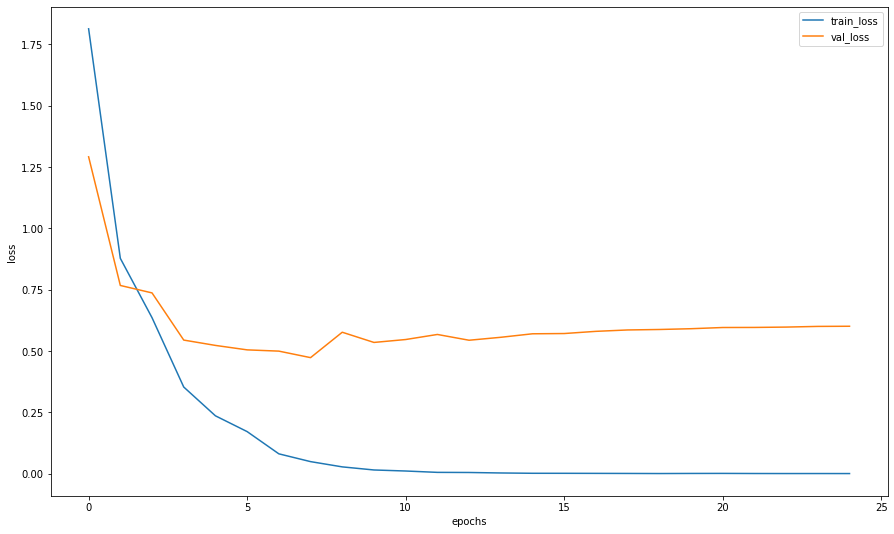

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

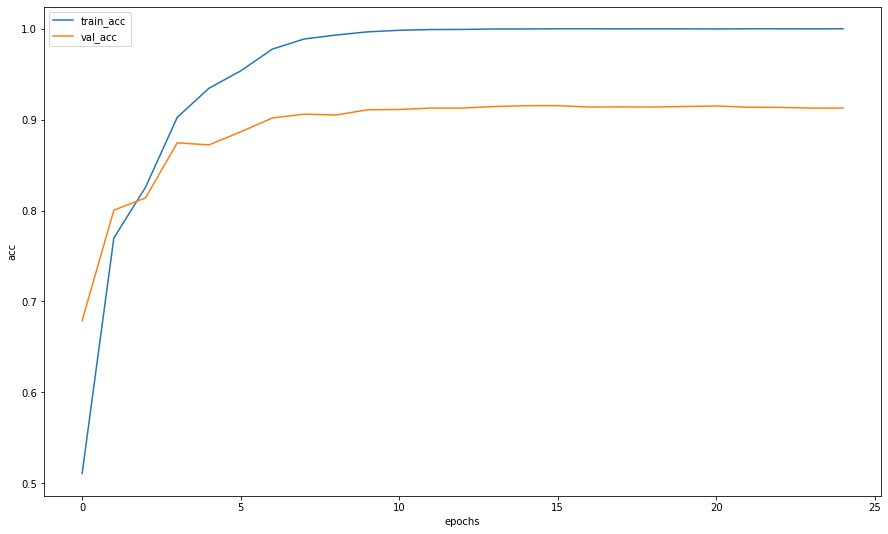

In [ ]:
plt.figure(figsize=(15, 9))
plt.plot(acc, label="train_acc")
plt.plot(val_acc, label="val_acc")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

### Ну и что теперь со всем этим делать?

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [ ]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [ ]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(alex_dif_lr, ex_img.unsqueeze(0))

In [ ]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(alex_dif_lr, imgs)

In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [ ]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [ ]:
from sklearn.metrics import f1_score

f1_score(actual_labels, y_pred, average='micro')


0.9500000000000001

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

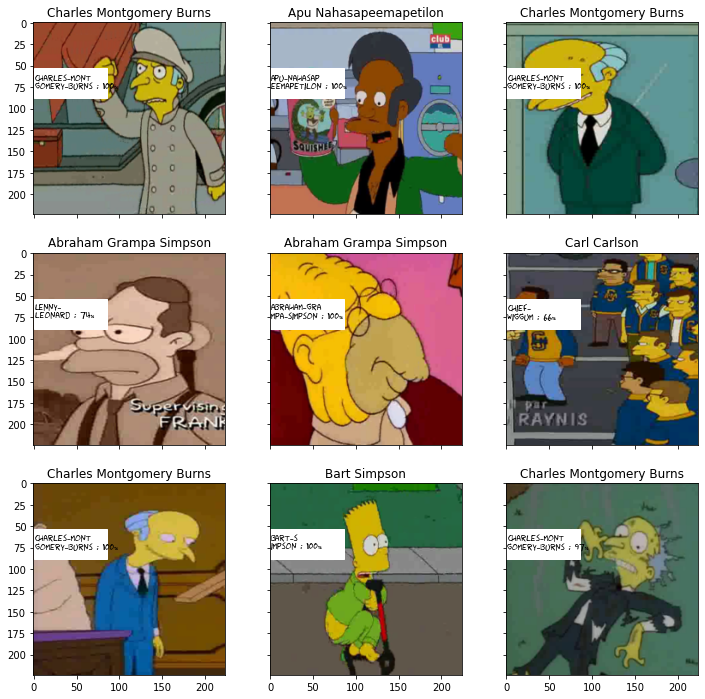

In [ ]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(alex_dif_lr, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(alex_dif_lr, test_loader)

preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [ ]:
# ДОБАВЛЕНО: создание сабмита
import pandas as pd
df = pd.DataFrame()
df['Id'] = test_filenames
df['Expected'] = preds
df.to_csv('gdrive/My Drive/simpsons_alex_dif_lr_baseline.csv', index=False)
# файл появится у вас на гугл диске

In [ ]:
! ls 

 characters_illustration.png	      sample_data
 gdrive				      sample_submission.csv
 label_encoder.pkl		      testset
'path_to\model_25epoch_weights.pth'   train
'path_to\model_pre_weights.pth'


In [ ]:
# ЗДЕСЬ что-то не работает. Не понятно зачем читайют лейблы 
#import pandas as pd
#my_submit = pd.read_csv("gdrive/My Drive/simpsons/data/labels.csv")
#my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
#my_submit.head()

In [ ]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

**Вывод**\
Лучшая модель: AlexNet с уменьшенным learning rate на первых слоях\

Результат на Kaggle: 0.97662
